In [1]:
import math

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import pylab
from sklearn import linear_model
from sklearn.cluster import KMeans
import scipy.stats as stats
import statsmodels.api as sm
from datetime import datetime

parsing data


In [2]:
coin_day = pd.read_csv('../files/BTC-USD.csv', parse_dates=['Date'])
coin_day.head()
# coin_day.info()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-05-20,8196.923828,8200.967773,7678.781738,7978.309082,7978.309082,23843404340
1,2019-05-21,7977.969238,8062.167969,7843.339844,7963.327637,7963.327637,25127245056
2,2019-05-22,7956.291992,7997.612305,7615.987305,7680.066406,7680.066406,24719473175
3,2019-05-23,7677.269043,7943.791504,7533.196777,7881.846680,7881.846680,24457107820
4,2019-05-24,7881.695313,8140.719727,7824.448730,7987.371582,7987.371582,25919126991


In [66]:
coin_day['x_axis'] = np.arange(len(coin_day['High']))
coin_day.info()
# X = pd.DataFrame(columns=['Date', 'High'])
# X[['Date', 'High']] = coin_day[['x_axis', 'High']]
X=coin_day.iloc[:, [10,2]].values
print(X.shape)
cluster = KMeans(n_clusters=4, random_state=100).fit_predict(X)
print(cluster)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1092 entries, 0 to 1091
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           1092 non-null   datetime64[ns]
 1   Open           1092 non-null   float64       
 2   High           1092 non-null   float64       
 3   Low            1092 non-null   float64       
 4   Close          1092 non-null   float64       
 5   Adj Close      1092 non-null   float64       
 6   Volume         1092 non-null   int64         
 7   fit_high_low   1092 non-null   float64       
 8   residual       1092 non-null   float64       
 9   fit_high_open  1092 non-null   float64       
 10  x_axis         1092 non-null   int64         
dtypes: datetime64[ns](1), float64(8), int64(2)
memory usage: 94.0 KB
(1092, 2)
[1 1 1 ... 2 2 2]


Text(0.5, 1.0, 'BTC high price (USD) by time')

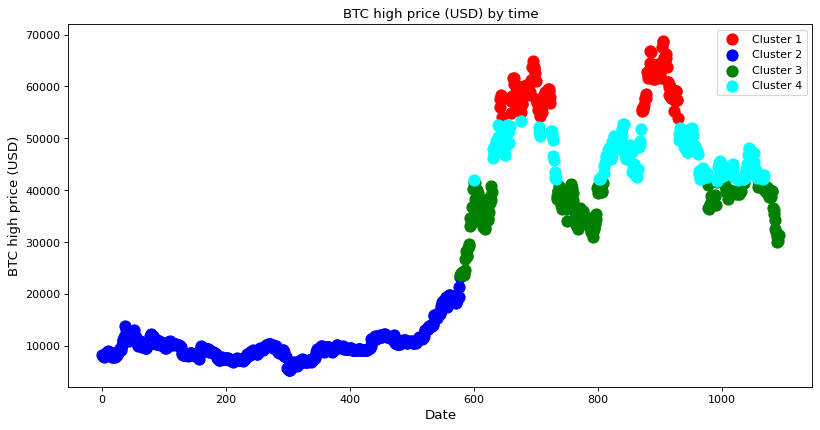

In [68]:
figure(figsize=(12,6), dpi=80)
plt.scatter(X[cluster==0, 0], X[cluster==0, 1], s=100, c='red', label ='Cluster 1')
plt.scatter(X[cluster==1, 0], X[cluster==1, 1], s=100, c='blue', label ='Cluster 2')
plt.scatter(X[cluster==2, 0], X[cluster==2, 1], s=100, c='green', label ='Cluster 3')
plt.scatter(X[cluster==3, 0], X[cluster==3, 1], s=100, c='cyan', label ='Cluster 4')
plt.legend()
plt.xlabel('Date', fontsize = 12)
plt.ylabel('BTC high price (USD)', fontsize = 12)
plt.title('BTC high price (USD) by time', fontsize = 12)

In [61]:
label_size = np.unique(cluster)

plt.scatter(X[:,0], X[:,1], c = cluster.labels_.astype(float))
# colors = np.random.rand(label_size)
# for i in label_size:
#     plt.scatter(X[cluster == i , 0] , X[cluster == i , 1], c = 'rainbow')

plt.legend()
plt.show()

InvalidIndexError: (slice(None, None, None), 0)

Text(0.5, 1.0, 'BTC high price (USD) by time')

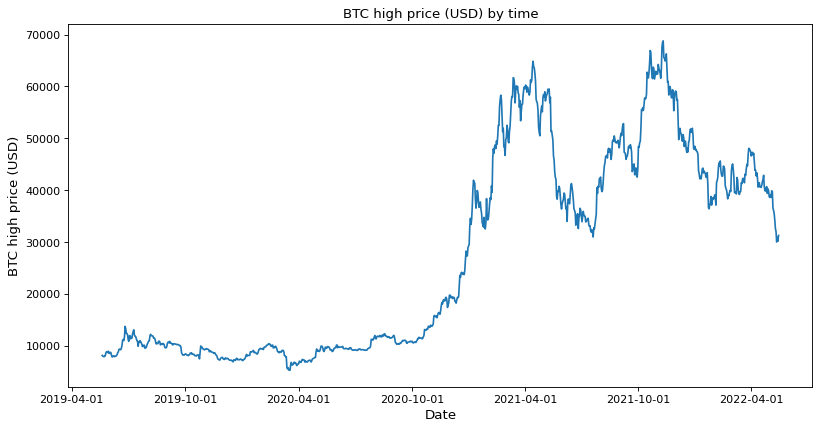

In [3]:
figure(figsize=(12,6), dpi=80)
plt.plot(coin_day['Date'], coin_day['High'])
x = np.arange(np.datetime64("2019-04-20"), np.datetime64("2022-05-20"), np.timedelta64(6, 'M'), dtype='datetime64[M]')
plt.xticks(x)
plt.xlabel('Date', fontsize = 12)
plt.ylabel('BTC high price (USD)', fontsize = 12)
plt.title('BTC high price (USD) by time', fontsize = 12)

Text(0.5, 1.0, 'Distribution of BTC price')

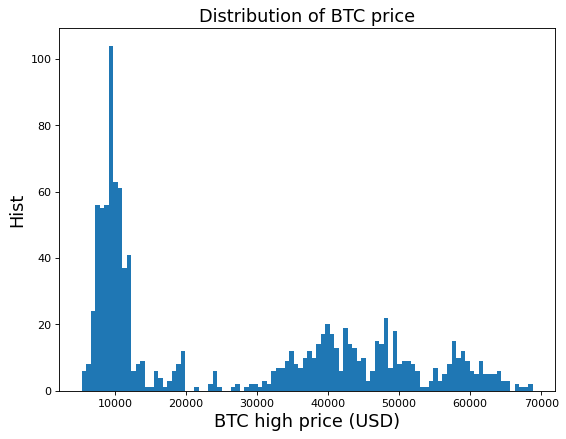

In [4]:
figure(figsize=(8,6), dpi=80)
plt.hist(coin_day['High'], bins=100)
plt.xlabel('BTC high price (USD)', fontsize = 16)
plt.ylabel('Hist', fontsize = 16)
plt.title('Distribution of BTC price', fontsize = 16)

Vẽ đồ thị biểu diễn High qua Low, ta nhận thấy mối quan hệ tuyến tính giữa 2 biến này

Text(0.5, 1.0, 'BTC high ~ low price')

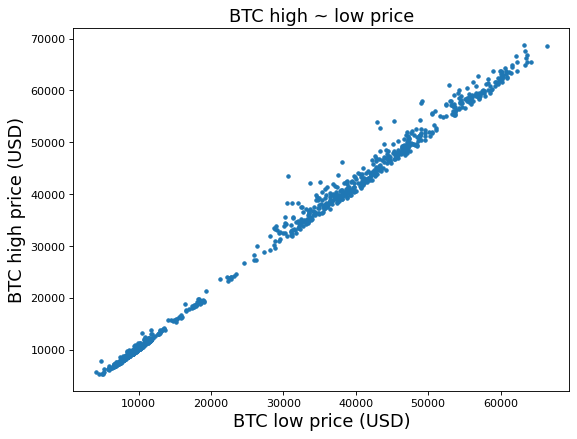

In [5]:
figure(figsize=(8,6), dpi=80)
plt.plot(coin_day['Low'], coin_day['High'], '.')
plt.xlabel('BTC low price (USD)', fontsize = 16)
plt.ylabel('BTC high price (USD)', fontsize = 16)
plt.title('BTC high ~ low price', fontsize = 16)

Text(0.5, 1.0, 'BTC high ~ open price')

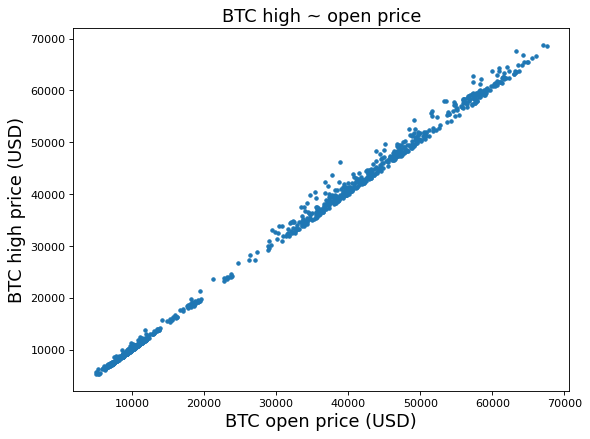

In [6]:
figure(figsize=(8,6), dpi=80)
plt.plot(coin_day['Open'], coin_day['High'], '.')
plt.xlabel('BTC open price (USD)', fontsize = 16)
plt.ylabel('BTC high price (USD)', fontsize = 16)
plt.title('BTC high ~ open price', fontsize = 16)

Thử fit sủ dụng mô hình lm đơn giản

In [7]:
model_high_low = stats.linregress(coin_day['Low'], coin_day['High'])
print(model_high_low)

LinregressResult(slope=1.0566147485822226, intercept=-15.028718096898956, rvalue=0.9982629285486169, pvalue=0.0, stderr=0.0018888333103647844, intercept_stderr=59.513821018012415)


Ngoài ra ta có thể sử dụng thư viện statsmodels để hồi quy cũng thu được kết quả tương tự
Tuy nhiên giá trị p-value cho hệ số tự do > 0.05 nên ta có thể fit mô hình bỏ qua hệ số này

In [9]:
X = sm.add_constant(coin_day['Low'])
sm_model_high_low = sm.OLS(coin_day['High'], X).fit()
print(sm_model_high_low.params)
print(sm_model_high_low.pvalues)
sm_model_high_low.summary()

const   -15.028718
Low       1.056615
dtype: float64
const    0.800683
Low      0.000000
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   High   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                 3.129e+05
Date:                Thu, 26 May 2022   Prob (F-statistic):               0.00
Time:                        13:41:50   Log-Likelihood:                -9231.8
No. Observations:                1092   AIC:                         1.847e+04
Df Residuals:                    1090   BIC:                         1.848e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -15.0287     59.514     -0.253      0.801    -131.803     101.746
Low            1.0566      0.002    559.401      0.000       1.053       1.060
==============================================================================
Omnibus:                      802.384   Durbin-Watson:                   1.334
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            17126.458
Skew:                           3.163   Prob(JB):                         0.00
Kurtosis:                      21.341   Cond. No.                     5.45e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.45e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Gía trị p-value là rất thấp cho hệ số Low khi bỏ qua tham số tự do

In [10]:
# X = sm.add_constant(coin_day['Low'])
sm_model_high_low = sm.OLS(coin_day['High'], coin_day['Low']).fit()
print(sm_model_high_low.params)
sm_model_high_low.pvalues
sm_model_high_low.params[0]
sm_model_high_low.summary()

Low    1.056226
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                   High   R-squared (uncentered):                   0.999
Model:                            OLS   Adj. R-squared (uncentered):              0.999
Method:                 Least Squares   F-statistic:                          9.367e+05
Date:                Thu, 26 May 2022   Prob (F-statistic):                        0.00
Time:                        13:42:11   Log-Likelihood:                         -9231.8
No. Observations:                1092   AIC:                                  1.847e+04
Df Residuals:                    1091   BIC:                                  1.847e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Low            1.0562      0.001    967.823      0.000       1.054       1.058
==============================================================================
Omnibus:                      804.890   Durbin-Watson:                   1.333
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            17218.785
Skew:                           3.177   Prob(JB):                         0.00
Kurtosis:                      21.387   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

KeyError: 'fit_high_low'

In [13]:
def regress_high_low(x):
    return sm_model_high_low.params[0] * x

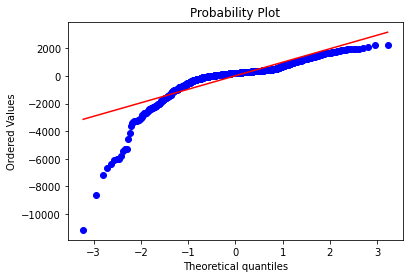

In [14]:
coin_day['fit_high_low'] = coin_day['Low'].apply(regress_high_low)
# coin_day.head()
coin_day['residual'] = coin_day['fit_high_low'] - coin_day['High']

stats.probplot(coin_day['residual'], dist='norm', plot=pylab)
pylab.show()

In [20]:
RSS = np.sum((coin_day['High'] - coin_day['fit_high_low'])**2)
s2 = RSS / (len(coin_day['High']) - 1)
print(round(RSS, 3))
print(round(s2, 3))
print(round(np.sqrt(s2), 3))

1408696015.85
1291197.081
1136.309


Text(0.5, 1.0, 'Linear model for High ~ Low, slope=1.056226')

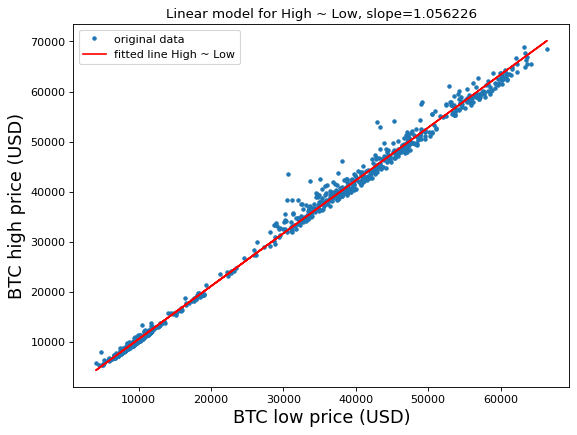

In [24]:
figure(figsize=(8,6), dpi=80)
plt.plot(coin_day['Low'], coin_day['High'], '.', label = 'original data')
plt.plot(coin_day['Low'], coin_day['fit_high_low'], 'r', label = 'fitted line High ~ Low')
plt.xlabel('BTC low price (USD)', fontsize = 16)
plt.ylabel('BTC high price (USD)', fontsize = 16)
plt.legend()
plt.title('Linear model for High ~ Low, slope=1.056226')

Ta có thể đưa ra nhận xét sơ bộ là giá trị High, Low không có sự biến đổi nhiều trong ngày (slope ~ 1)
Nói chính xác thì so với giá trị Low thì sự thay đổi về giá là nhỏ

Text(0.5, 1.0, 'residual ~ low')

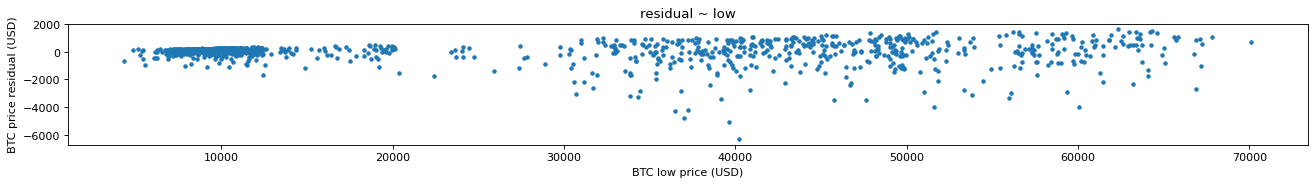

In [29]:
figure(figsize=(20,2), dpi=80)
plt.plot(coin_day['fit_high_low'], coin_day['residual'], '.')
plt.xlabel('BTC low price (USD)', fontsize = 10)
plt.ylabel('BTC price residual (USD)', fontsize = 10)
plt.title('residual ~ low')

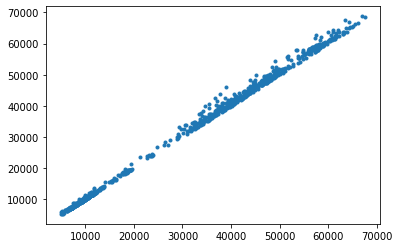

In [13]:
plt.plot(coin_day['Open'], coin_day['High'], '.')

In [18]:
model_high_open = stats.linregress(coin_day['Open'], coin_day['High'])
print(model_high_open)

LinregressResult(slope=1.0251374419780301, intercept=16.15557357362559, rvalue=0.9991361557958539, pvalue=0.0, stderr=0.0012914662779726501, intercept_stderr=41.921515469847016)


Khi hồi quy cho biến High và Open ta cũng thu được kết luận tương tự như khi hồi quy với Low

In [21]:
# X = sm.add_constant(coin_day['Open'])
sm_model_high_open = sm.OLS(coin_day['High'], coin_day['Open']).fit()
print(sm_model_high_open.params)
print(sm_model_high_open.pvalues)
# sm_model_high_open.summary()
# sm_model_high_open.pvalues

Open    1.025543
dtype: float64
Open    0.0
dtype: float64


In [24]:
def regress_high_open(x):
    return sm_model_high_open.params[0] * x

In [25]:
coin_day['fit_high_open'] = coin_day['Open'].apply(regress_high_open)
# coin_day.head()
coin_day['residual'] = coin_day['fit_high_open'] - coin_day['High']

# stats.probplot(coin_day['residual'], dist='norm', plot=pylab)
# pylab.show()

In [27]:
RSS = np.sum((coin_day['High'] - coin_day['fit_high_open'])**2)
s2 = RSS / (len(coin_day['High']) - 1)
print(round(RSS, 3))
print(round(s2, 3))
print(round(np.sqrt(s2), 3))

700903989.927
642441.787
801.525


Text(0.5, 1.0, 'residual ~ open')

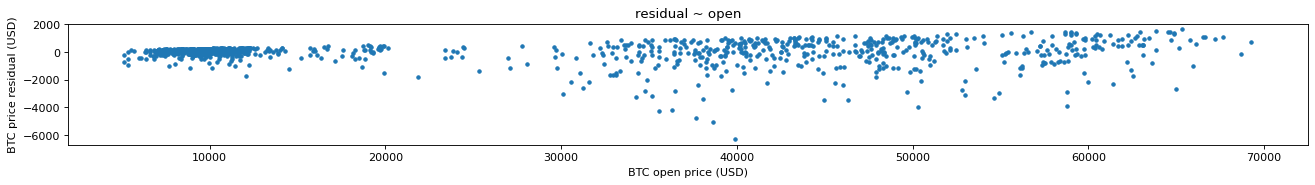

In [26]:
figure(figsize=(20,2), dpi=80)
plt.plot(coin_day['fit_high_open'], coin_day['residual'], '.')
plt.xlabel('BTC open price (USD)', fontsize = 10)
plt.ylabel('BTC price residual (USD)', fontsize = 10)
plt.title('residual ~ open')

Text(0.5, 1.0, 'Linear model for High ~ Open, slope=1.025543')

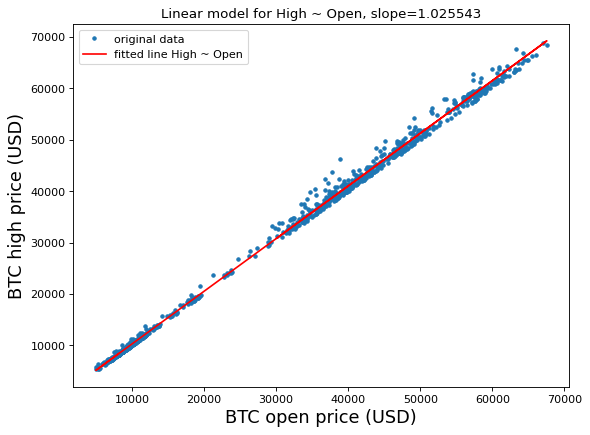

In [25]:
figure(figsize=(8,6), dpi=80)
plt.plot(coin_day['Open'], coin_day['High'], '.', label = 'original data')
plt.plot(coin_day['Open'], coin_day['fit_high_open'], 'r', label = 'fitted line High ~ Open')
plt.xlabel('BTC open price (USD)', fontsize = 16)
plt.ylabel('BTC high price (USD)', fontsize = 16)
plt.legend()
plt.title('Linear model for High ~ Open, slope=1.025543')

In [34]:
est = sm.OLS(coin_day['High'], coin_day[['Low', 'Open']]).fit()
print(est.params)
print(est.pvalues)
est.summary()

Low     0.243457
Open    0.789356
dtype: float64
Low      1.246956e-26
Open    3.201387e-192
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                   High   R-squared (uncentered):                   0.999
Model:                            OLS   Adj. R-squared (uncentered):              0.999
Method:                 Least Squares   F-statistic:                          1.045e+06
Date:                Thu, 26 May 2022   Prob (F-statistic):                        0.00
Time:                        01:38:10   Log-Likelihood:                         -8793.5
No. Observations:                1092   AIC:                                  1.759e+04
Df Residuals:                    1090   BIC:                                  1.760e+04
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Low            0.2435      0.022     10.969      0.000       0.200       0.287
Open           0.7894      0.022     36.641      0.000       0.747       0.832
==============================================================================
Omnibus:                      650.245   Durbin-Watson:                   1.780
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7331.096
Skew:                           2.565   Prob(JB):                         0.00
Kurtosis:                      14.611   Cond. No.                         60.7
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

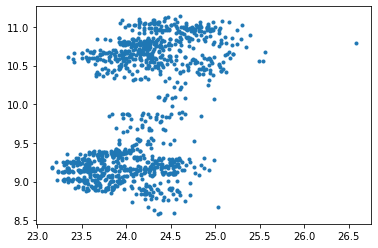

In [112]:
plt.plot(np.log(coin_day['Volume']), np.log(coin_day['High']), '.')

In [113]:
model_high_volume = stats.linregress(np.log(coin_day['Volume']), np.log(coin_day['High']))
print(model_high_volume)

LinregressResult(slope=0.793661743879773, intercept=-9.255683569108886, rvalue=0.4573208669746918, pvalue=8.49671362820016e-58, stderr=0.04663978311521666, intercept_stderr=1.1268110634154194)


(array([50., 84., 84., 66., 66., 43., 36., 30., 27., 20., 18., 18.,  8.,
        14., 13., 15., 17., 10., 16., 11., 20., 13., 15., 17., 15., 18.,
        11., 12., 16.,  9.,  9., 11., 12., 13., 10., 15., 11., 13.,  9.,
         7., 11.,  9.,  7., 11.,  4.,  8.,  7.,  4.,  6.,  6., 10.,  5.,
         3.,  2.,  5.,  5.,  4.,  1.,  4.,  5.,  5.,  2.,  5.,  3.,  2.,
         2.,  3.,  4.,  4.,  2.,  0.,  1.,  3.,  2.,  3.,  1.,  2.,  1.,
         4.,  2.,  1.,  3.,  0.,  2.,  2.,  0.,  2.,  0.,  1.,  0.,  1.,
         1.,  0.,  0.,  0.,  0.,  1.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,
         0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  1.,  0.,  1.,  0.,  0.,
         0.,  0.,  2.,  0.,  0.,  0.,  1.,  0.,  1.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.

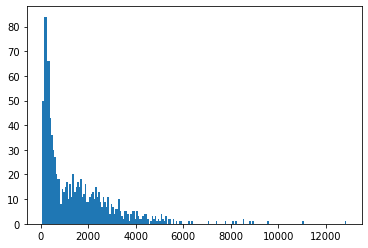

In [36]:
plt.hist(coin_day['High'] - coin_day['Low'], bins=200)

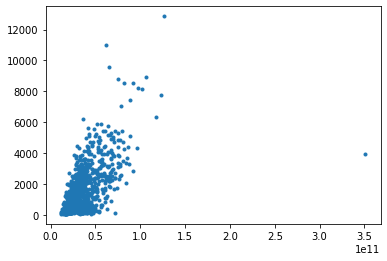

In [19]:
plt.plot(coin_day['Volume'], coin_day['High'] - coin_day['Low'], '.')

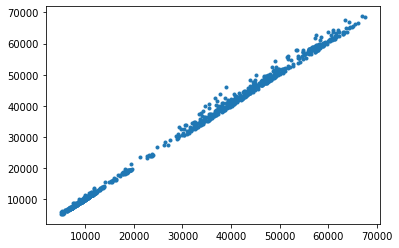

In [102]:
# model_high_open = stats.linregress(coin_day['Open'], coin_day['High'])
plt.plot(coin_day['Open'], coin_day['High'], '.')

In [3]:
custom_date_parser = lambda x: datetime.strptime(x, "%m/%d/%Y")
coin_week = pd.read_csv('../files/bitcoin_20170520_20220520_week.csv', parse_dates=['Date'], date_parser=custom_date_parser)
coin_week.head()

,Date,Open,High,Low,Close
0,2022-05-20,"29,370","31,346","28,637","29,121"
1,2022-05-14,"35,775","35,816","25,805","29,370"
2,2022-05-07,"38,332","39,890","35,387","35,775"
3,2022-04-30,"39,794","40,748","37,746","38,332"
4,2022-04-23,"41,300","42,949","39,214","39,794"


convert number data

In [8]:
coin_week[['Open', 'High', 'Low', 'Close']] = coin_week[['Open', 'High', 'Low', 'Close']].replace({',': ''}, regex=True).astype(float)
coin_week.info()
coin_week.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    5 non-null      datetime64[ns]
 1   Open    5 non-null      float64       
 2   High    5 non-null      float64       
 3   Low     5 non-null      float64       
 4   Close   5 non-null      float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 328.0 bytes


,Date,Open,High,Low,Close
0,2022-05-20,29370.0,31346.0,28637.0,29121.0
1,2022-05-14,35775.0,35816.0,25805.0,29370.0
2,2022-05-07,38332.0,39890.0,35387.0,35775.0
3,2022-04-30,39794.0,40748.0,37746.0,38332.0
4,2022-04-23,41300.0,42949.0,39214.0,39794.0


In [23]:
len(coin_week[['High']])
# plt.hist(coin_week['High',], bins=1000)
# plt.show()

5

In [123]:
# custom_date_parser = lambda x: datetime.strptime(x, "%Y-%m-%d %H:%M:%S")
# df = pd.read_csv("../files/coin_Aave.csv", parse_dates=['Date'], date_parser=custom_date_parser)
# df.head()

In [124]:
# fig, ax = plt.subplots()
# ax.plot(df[['Date']], df[['Open']])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    13 non-null     datetime64[ns]
 1   Open    13 non-null     float64       
 2   High    13 non-null     float64       
 3   Low     13 non-null     float64       
 4   Close   13 non-null     float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 648.0 bytes
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    13 non-null     datetime64[ns]
 1   Open    13 non-null     float64       
 2   High    13 non-null     float64       
 3   Low     13 non-null     float64       
 4   Close   13 non-null     float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 648.0 bytes


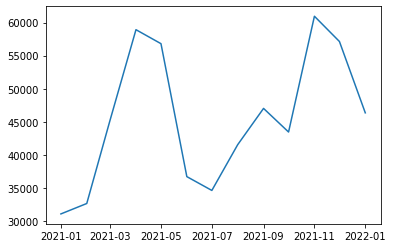

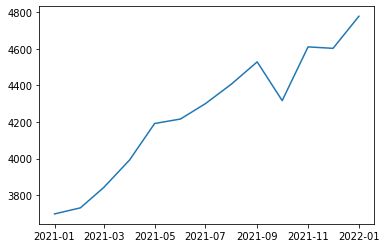

In [125]:
custom_date_parser = lambda x: datetime.strptime(x, "%m/%d/%Y")
coin_month = pd.read_csv("../files/CRYPTOCURRENCY_US_COINDESK_BTCUSD_MONTH.csv", parse_dates=['Date'], date_parser=custom_date_parser)
sp_month = pd.read_csv("../files/INDEX_US_S&P US_SPX_MONTH.csv", parse_dates=['Date'], date_parser=custom_date_parser)

coin_month[['Open', 'High', 'Low', 'Close']] = coin_month[['Open', 'High', 'Low', 'Close']].replace({',': ''}, regex=True).astype(float)
sp_month[['Open', 'High', 'Low', 'Close']] = sp_month[['Open', 'High', 'Low', 'Close']].replace({',': ''}, regex=True).astype(float)

# coin_month.info()
# sp_month.info()

fig_coin, ax_coin = plt.subplots()
fig_sp, ax_sp = plt.subplots()

ax_coin.plot(coin_month[['Date']], coin_month[['Open']])
ax_sp.plot(sp_month[['Date']], sp_month[['Open']])

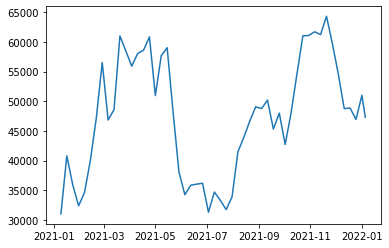

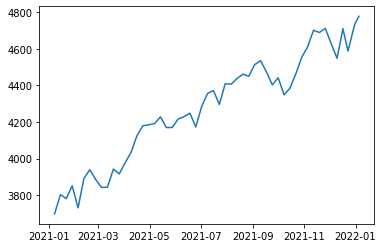

In [128]:
custom_date_parser = lambda x: datetime.strptime(x, "%m/%d/%Y")
coin_week = pd.read_csv("../files/CRYPTOCURRENCY_US_COINDESK_BTCUSD_WEEK.csv", parse_dates=['Date'], date_parser=custom_date_parser)
sp_week = pd.read_csv("../files/INDEX_US_S&P US_SPX_WEEK.csv", parse_dates=['Date'], date_parser=custom_date_parser)

coin_week[['Open', 'High', 'Low', 'Close']] = coin_week[['Open', 'High', 'Low', 'Close']].replace({',': ''}, regex=True).astype(float)
sp_week[['Open', 'High', 'Low', 'Close']] = sp_week[['Open', 'High', 'Low', 'Close']].replace({',': ''}, regex=True).astype(float)

# coin_month.info()
# sp_month.info()

fig_coin, ax_coin = plt.subplots()
fig_sp, ax_sp = plt.subplots()

ax_coin.plot(coin_week[['Date']], coin_week[['Open']])
ax_sp.plot(sp_week[['Date']], sp_week[['Open']])